# ✨ 피마 인디언의 당뇨병 데이터 ✨

In [3]:
!pip install --upgrade tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\envs\\new_env\\lib\\site-packages\\numpy-1.19.1.dist-info\\direct_url.json'


  Using cached tensorflow-2.3.0-cp37-cp37m-win_amd64.whl (342.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached scipy-1.4.1-cp37-cp37m-win_amd64.whl (30.9 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:


Consider using the `--user` option or check the permissions.



In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv", 
                 names = ["pregnant", "plasma", "pressure", "thickness", 
                          "insulin", "BMI", "pedigree", "age", "class"])

In [6]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [16]:
# 임신 횟수당 당뇨병 발병 횟수
df[['pregnant', 'class']].groupby(['pregnant'], 
                                  as_index = False).mean().sort_values(by = 'pregnant', ascending = True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [19]:
!pip install matplotlib

  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

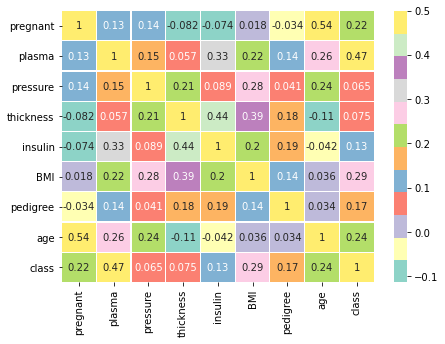

In [65]:
plt.figure(figsize = (7, 5))

sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.Set3,
           linecolor = 'white', annot = True)
# annot : data 값을 각 셀에 표시
plt.show()

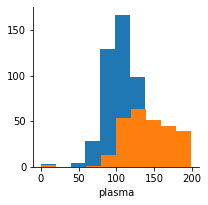

In [41]:
# 다중 그리드를 만들어줌
#grid = sns.FacetGrid(df, col = 'class')
#grid = sns.FacetGrid(df, row = 'class')
grid = sns.FacetGrid(df, hue = 'class')

grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

# ✨ 피마 인디언의 당뇨병 예측 실행 ✨

In [67]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [10]:
tf.__version__   # 2.0.0

'2.0.0'

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [24]:
model = Sequential()

#히든레이어 2개
model.add(Dense(12, input_dim = 8, activation = 'relu'))  #입력 뉴런 8개, 출력 뉴런 12개   #히든레이어
model.add(Dense(8, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(1, activation = 'sigmoid'))               #입력 뉴런 8개, 출력 뉴런 1개

model.compile(loss = 'binary_crossentropy',   #손실함수 : 이진분류 (최소 제곱법 사용할 경우, 로컬 미니엄을 찾을 위험이 있음)
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 10)   #batch_size : 10개씩 결과를 보고 가중치를 갱신 (숫자 작으면 시간 오래걸림)
                                                 #10개(batch_size)씩 200번(epochs) 훈련

print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

# 모두 음성인 경우가 65% 정도 이므로 정확도가 65% 보다 낮게 나오면 모두 음성으로 판단하는 것보다 낮은 확률인 것

Epoch 1/200
768/768 [==============================] - 0s 187us/step - loss: 5.5959 - accuracy: 0.5898
Epoch 2/200
768/768 [==============================] - 0s 70us/step - loss: 1.3267 - accuracy: 0.5872
Epoch 3/200
768/768 [==============================] - 0s 71us/step - loss: 1.0256 - accuracy: 0.6198
Epoch 4/200
768/768 [==============================] - 0s 74us/step - loss: 0.9482 - accuracy: 0.6367
Epoch 5/200
768/768 [==============================] - 0s 71us/step - loss: 0.8585 - accuracy: 0.6146
Epoch 6/200
768/768 [==============================] - 0s 71us/step - loss: 0.8077 - accuracy: 0.6406
Epoch 7/200
768/768 [==============================] - 0s 71us/step - loss: 0.7945 - accuracy: 0.6289
Epoch 8/200
768/768 [==============================] - 0s 71us/step - loss: 0.7512 - accuracy: 0.6497
Epoch 9/200
768/768 [==============================] - 0s 70us/step - loss: 0.7215 - accuracy: 0.6393
Epoch 10/200
768/768 [==============================] - 0s 73us/step - loss: 0.69

768/768 [==============================] - 0s 72us/step - loss: 0.4966 - accuracy: 0.7513
Epoch 160/200
768/768 [==============================] - 0s 74us/step - loss: 0.4885 - accuracy: 0.7708
Epoch 161/200
768/768 [==============================] - 0s 72us/step - loss: 0.4908 - accuracy: 0.7565
Epoch 162/200
768/768 [==============================] - 0s 74us/step - loss: 0.4859 - accuracy: 0.7474
Epoch 163/200
768/768 [==============================] - 0s 73us/step - loss: 0.4968 - accuracy: 0.7539
Epoch 164/200
768/768 [==============================] - 0s 72us/step - loss: 0.5055 - accuracy: 0.7474
Epoch 165/200
768/768 [==============================] - 0s 72us/step - loss: 0.5118 - accuracy: 0.7552
Epoch 166/200
768/768 [==============================] - 0s 73us/step - loss: 0.4820 - accuracy: 0.7630
Epoch 167/200
768/768 [==============================] - 0s 73us/step - loss: 0.4970 - accuracy: 0.7591
Epoch 168/200
768/768 [==============================] - 0s 73us/step - loss: 

In [41]:
model = Sequential()

#히든레이어 2개
model.add(Dense(35, input_dim = 8, activation = 'relu'))  #입력 뉴런 8개, 출력 뉴런 12개   #히든레이어
model.add(Dense(35, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(35, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(35, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(35, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(35, activation = 'relu'))                  #입력 뉴런 12개, 출력 뉴런 8개   #히든레이어
model.add(Dense(1, activation = 'sigmoid'))               #입력 뉴런 8개, 출력 뉴런 1개

model.compile(loss = 'binary_crossentropy',   #손실함수 : 이진분류 (최소 제곱법 사용할 경우, 로컬 미니엄을 찾을 위험이 있음)
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 10)   #batch_size : 10개씩 결과를 보고 가중치를 갱신 (숫자 작으면 시간 오래걸림)
                                                 #10개(batch_size)씩 200번(epochs) 훈련

print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

# 모두 음성인 경우가 65% 정도 이므로 정확도가 65% 보다 낮게 나오면 모두 음성으로 판단하는 것보다 낮은 확률인 것

Epoch 1/200
768/768 [==============================] - 0s 292us/step - loss: 1.1839 - accuracy: 0.5898
Epoch 2/200
768/768 [==============================] - 0s 105us/step - loss: 0.7276 - accuracy: 0.6289
Epoch 3/200
768/768 [==============================] - 0s 105us/step - loss: 0.6480 - accuracy: 0.6380
Epoch 4/200
768/768 [==============================] - 0s 104us/step - loss: 0.6497 - accuracy: 0.6445
Epoch 5/200
768/768 [==============================] - 0s 108us/step - loss: 0.6437 - accuracy: 0.6419
Epoch 6/200
768/768 [==============================] - 0s 105us/step - loss: 0.6265 - accuracy: 0.6667
Epoch 7/200
768/768 [==============================] - 0s 108us/step - loss: 0.6131 - accuracy: 0.6693
Epoch 8/200
768/768 [==============================] - 0s 101us/step - loss: 0.6107 - accuracy: 0.6823
Epoch 9/200
768/768 [==============================] - 0s 102us/step - loss: 0.5988 - accuracy: 0.6628
Epoch 10/200
768/768 [==============================] - 0s 107us/step - l

768/768 [==============================] - 0s 104us/step - loss: 0.3470 - accuracy: 0.8229
Epoch 159/200
768/768 [==============================] - 0s 100us/step - loss: 0.3404 - accuracy: 0.8359
Epoch 160/200
768/768 [==============================] - 0s 99us/step - loss: 0.3619 - accuracy: 0.8281
Epoch 161/200
768/768 [==============================] - 0s 100us/step - loss: 0.3140 - accuracy: 0.8633
Epoch 162/200
768/768 [==============================] - 0s 103us/step - loss: 0.3813 - accuracy: 0.8177
Epoch 163/200
768/768 [==============================] - 0s 100us/step - loss: 0.3306 - accuracy: 0.8607
Epoch 164/200
768/768 [==============================] - 0s 96us/step - loss: 0.3163 - accuracy: 0.8581
Epoch 165/200
768/768 [==============================] - 0s 94us/step - loss: 0.3277 - accuracy: 0.8542
Epoch 166/200
768/768 [==============================] - 0s 103us/step - loss: 0.3167 - accuracy: 0.8516
Epoch 167/200
768/768 [==============================] - 0s 103us/step -

# ✨ 아이리스 품종 데이터 ✨

In [4]:
df = pd.read_csv("iris.csv", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이 (단위 : cm) , 품종

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
!pip install seaborn

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

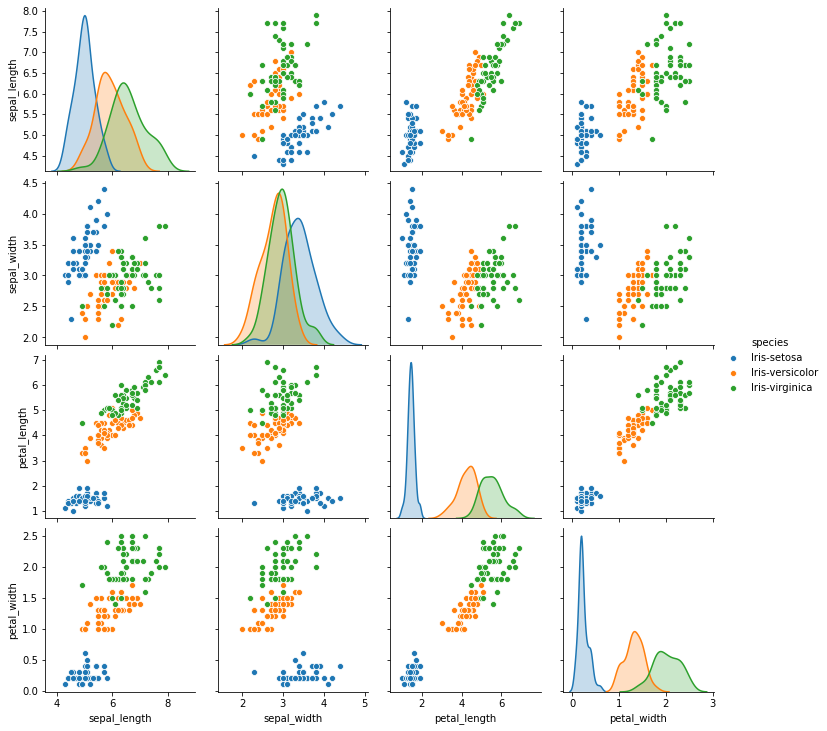

In [6]:
sns.pairplot(df, hue = 'species')
plt.show()

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
df = pd.read_csv("iris.csv", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

#sns.pairplot(df, hue = 'species')
#plt.show()

dataset = df.values
X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4].astype(float)

Y_encoded = np_utils.to_categorical(Y)  # one-hot encoding
#???????

model = Sequential()

#히든레이어 2개
model.add(Dense(16, input_dim = 8, activation = 'relu'))  #입력 뉴런 8개, 출력 뉴런 16개   #히든레이어
model.add(Dense(3, activation = 'softmax'))                  #입력 뉴런 16개, 출력 뉴런 3개(품종이 3개)

# 다중분류를 위해 softmax 사용 : 총합이 1인 형태로 변환 -> 큰 값이 두드러지게, 작은 값은 더 작아지게

model.compile(loss = 'categorical_crossentropy',   #손실함수 : 다중분류 (최소 제곱법 사용할 경우, 로컬 미니엄을 찾을 위험이 있음)
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X, Y_encoded, epochs = 50, batch_size = 1)  

print("\n Accuracy : %.4f" % (model.evaluate(X, Y_encoded)[1]))

ValueError: could not convert string to float: 'Iris-setosa'

# ✨ 과적합 피하기 ✨
🐶 과적합 : 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도 함

🦊 학습셋과 테스트셋의 비율을 나누자          
🦊 학습셋(70), 테스트셋(30)
        
🐱 학습을 진행해도 테스트 결과가 더 이상 좋아지지 않는 지점에서 학습을 멈춰야 함.           
🐱 이 때의 학습 정도가 가장 적절한 것으로 볼 수 있음.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
!pip install sklearn

Processing c:\users\user\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [22]:
df = pd.read_csv("sonar.csv", header = None)

dataset = df.values
X = dataset[: , 0:60]
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)


# 학습셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)


# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


# 모델 컴파일
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 130, batch_size = 5)

# 테스트셋에 모델 적용
print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))
#print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))
#print("\n Accuracy : %.4f" % (model.evaluate(X_train, Y_train)[1]))

## ⭐⭐ 결과창 ⭐⭐ 
## epoch마다의 accuracy는 train data의 accuracy => 이건 증가하지만 맨 밑줄 test accuracy는 0.8로 낮다.

Epoch 1/130
145/145 [==============================] - 0s 574us/step - loss: 0.2550 - accuracy: 0.4690
Epoch 2/130
145/145 [==============================] - 0s 158us/step - loss: 0.2488 - accuracy: 0.5241
Epoch 3/130
145/145 [==============================] - 0s 172us/step - loss: 0.2452 - accuracy: 0.5793
Epoch 4/130
145/145 [==============================] - 0s 129us/step - loss: 0.2439 - accuracy: 0.6138
Epoch 5/130
145/145 [==============================] - 0s 157us/step - loss: 0.2392 - accuracy: 0.6414
Epoch 6/130
145/145 [==============================] - 0s 141us/step - loss: 0.2345 - accuracy: 0.7103
Epoch 7/130
145/145 [==============================] - 0s 138us/step - loss: 0.2294 - accuracy: 0.6897
Epoch 8/130
145/145 [==============================] - 0s 157us/step - loss: 0.2226 - accuracy: 0.7586
Epoch 9/130
145/145 [==============================] - 0s 150us/step - loss: 0.2158 - accuracy: 0.7448
Epoch 10/130
145/145 [==============================] - 0s 141us/step - l

In [23]:
# 모델 저장
from tensorflow.keras.models import load_model

model.save('my_model.h5')

In [24]:
# 모델 재사용
model = load_model('my_model.h5')

In [26]:
import keras

In [27]:
keras.__version__

'2.3.1'

# ✨ K겹 교차 검증 ✨
🐶 각각 다른 부분을 테스트셋으로 하는 n개의 테스트셋, 학습셋을 생성하여 검증하기      
🦊 데이터 양이 부족할 때 사용 => 앞으로는 사용하지 않는다.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy
import tensorflow as tf

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('sonar.csv', header = None)
print(df.head())

dataset = df.values
X = dataset[: , 0:60]
# X = dataset[: , 0:60].astype(float) 라고 쓰는 경우 fit 하기 전 converter를 안해도 됨
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [18]:
# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim = 60, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'mean_squared_error',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    
    X_train = tf.convert_to_tensor(X[train], dtype = tf.float32)
    Y_train = tf.convert_to_tensor(Y[train], dtype = tf.float32)

    model.fit(X_train, Y_train, epochs = 100, steps_per_epoch = 5)
    #model.fit(X_train, Y_train, epochs = 100)
    
    X_test = tf.convert_to_tensor(X[test], dtype = tf.float32)
    Y_test = tf.convert_to_tensor(Y[test], dtype = tf.float32)
    
    k_accuracy = "%.4f" % (model.evaluate(X_test, Y_test)[1])
    accuracy.append(k_accuracy)
    
# 결과 출력
print("\n %.f fold accuracy : " % n_fold, accuracy)

# 실행 후 10번의 테스트 값들이 출력되었음

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.5294
Epoch 2/100
5/5 [==============================] - 0s 808us/step - loss: 0.2402 - accuracy: 0.5775
Epoch 3/100
5/5 [==============================] - 0s 998us/step - loss: 0.2346 - accuracy: 0.6043
Epoch 4/100
5/5 [==============================] - 0s 997us/step - loss: 0.2298 - accuracy: 0.6257
Epoch 5/100
5/5 [==============================] - 0s 598us/step - loss: 0.2251 - accuracy: 0.6631
Epoch 6/100
5/5 [==============================] - 0s 997us/step - loss: 0.2212 - accuracy: 0.6631
Epoch 7/100
5/5 [==============================] - 0s 598us/step - loss: 0.2174 - accuracy: 0.6952
Epoch 8/100
5/5 [==============================] - 0s 798us/step - loss: 0.2138 - accuracy: 0.7059
Epoch 9/100
5/5 [==============================] - 0s 598us/step - loss: 0.2101 - accuracy: 0.7326
Epoch 10/100
5/5 [==============================] - 0s 798us/step - loss: 0.2066 - accuracy: 0.7487
Epoch 11/10

5/5 [==============================] - 0s 598us/step - loss: 0.0936 - accuracy: 0.8930
Epoch 81/100
5/5 [==============================] - 0s 798us/step - loss: 0.0925 - accuracy: 0.8877
Epoch 82/100
5/5 [==============================] - 0s 615us/step - loss: 0.0923 - accuracy: 0.8877
Epoch 83/100
5/5 [==============================] - 0s 598us/step - loss: 0.0907 - accuracy: 0.8824
Epoch 84/100
5/5 [==============================] - 0s 599us/step - loss: 0.0911 - accuracy: 0.8877
Epoch 85/100
5/5 [==============================] - 0s 798us/step - loss: 0.0896 - accuracy: 0.8824
Epoch 86/100
5/5 [==============================] - 0s 630us/step - loss: 0.0892 - accuracy: 0.8930
Epoch 87/100
5/5 [==============================] - 0s 816us/step - loss: 0.0880 - accuracy: 0.8930
Epoch 88/100
5/5 [==============================] - 0s 773us/step - loss: 0.0886 - accuracy: 0.8877
Epoch 89/100
5/5 [==============================] - 0s 596us/step - loss: 0.0863 - accuracy: 0.8877
Epoch 90/100


5/5 [==============================] - 0s 798us/step - loss: 0.1314 - accuracy: 0.8342
Epoch 62/100
5/5 [==============================] - 0s 815us/step - loss: 0.1281 - accuracy: 0.8449
Epoch 63/100
5/5 [==============================] - 0s 598us/step - loss: 0.1286 - accuracy: 0.8396
Epoch 64/100
5/5 [==============================] - 0s 599us/step - loss: 0.1271 - accuracy: 0.8449
Epoch 65/100
5/5 [==============================] - 0s 799us/step - loss: 0.1248 - accuracy: 0.8342
Epoch 66/100
5/5 [==============================] - 0s 800us/step - loss: 0.1244 - accuracy: 0.8396
Epoch 67/100
5/5 [==============================] - 0s 786us/step - loss: 0.1234 - accuracy: 0.8342
Epoch 68/100
5/5 [==============================] - 0s 798us/step - loss: 0.1231 - accuracy: 0.8449
Epoch 69/100
5/5 [==============================] - 0s 400us/step - loss: 0.1219 - accuracy: 0.8556
Epoch 70/100
5/5 [==============================] - 0s 598us/step - loss: 0.1210 - accuracy: 0.8396
Epoch 71/100


5/5 [==============================] - 0s 783us/step - loss: 0.1519 - accuracy: 0.8021
Epoch 43/100
5/5 [==============================] - 0s 598us/step - loss: 0.1495 - accuracy: 0.8289
Epoch 44/100
5/5 [==============================] - 0s 797us/step - loss: 0.1460 - accuracy: 0.8503
Epoch 45/100
5/5 [==============================] - 0s 798us/step - loss: 0.1444 - accuracy: 0.8449
Epoch 46/100
5/5 [==============================] - 0s 997us/step - loss: 0.1416 - accuracy: 0.8610
Epoch 47/100
5/5 [==============================] - 0s 598us/step - loss: 0.1404 - accuracy: 0.8396
Epoch 48/100
5/5 [==============================] - 0s 598us/step - loss: 0.1380 - accuracy: 0.8610
Epoch 49/100
5/5 [==============================] - 0s 798us/step - loss: 0.1374 - accuracy: 0.8503
Epoch 50/100
5/5 [==============================] - 0s 598us/step - loss: 0.1352 - accuracy: 0.8610
Epoch 51/100
5/5 [==============================] - 0s 798us/step - loss: 0.1335 - accuracy: 0.8449
Epoch 52/100


5/5 [==============================] - 0s 599us/step - loss: 0.2041 - accuracy: 0.7647
Epoch 21/100
5/5 [==============================] - 0s 581us/step - loss: 0.2009 - accuracy: 0.7968
Epoch 22/100
5/5 [==============================] - 0s 582us/step - loss: 0.1975 - accuracy: 0.7861
Epoch 23/100
5/5 [==============================] - 0s 997us/step - loss: 0.1944 - accuracy: 0.7861
Epoch 24/100
5/5 [==============================] - 0s 598us/step - loss: 0.1913 - accuracy: 0.7861
Epoch 25/100
5/5 [==============================] - 0s 613us/step - loss: 0.1878 - accuracy: 0.7968
Epoch 26/100
5/5 [==============================] - 0s 997us/step - loss: 0.1846 - accuracy: 0.8021
Epoch 27/100
5/5 [==============================] - 0s 598us/step - loss: 0.1814 - accuracy: 0.8021
Epoch 28/100
5/5 [==============================] - 0s 798us/step - loss: 0.1788 - accuracy: 0.7968
Epoch 29/100
5/5 [==============================] - 0s 799us/step - loss: 0.1753 - accuracy: 0.8075
Epoch 30/100


5/5 [==============================] - 0s 717us/step - loss: 0.2577 - accuracy: 0.4385
Epoch 2/100
5/5 [==============================] - 0s 800us/step - loss: 0.2512 - accuracy: 0.4652
Epoch 3/100
5/5 [==============================] - 0s 597us/step - loss: 0.2483 - accuracy: 0.5241
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.5508
Epoch 5/100
5/5 [==============================] - 0s 798us/step - loss: 0.2432 - accuracy: 0.6043
Epoch 6/100
5/5 [==============================] - 0s 600us/step - loss: 0.2401 - accuracy: 0.5829
Epoch 7/100
5/5 [==============================] - 0s 796us/step - loss: 0.2370 - accuracy: 0.5989
Epoch 8/100
5/5 [==============================] - 0s 693us/step - loss: 0.2336 - accuracy: 0.5829
Epoch 9/100
5/5 [==============================] - 0s 786us/step - loss: 0.2299 - accuracy: 0.6096
Epoch 10/100
5/5 [==============================] - 0s 611us/step - loss: 0.2263 - accuracy: 0.6417
Epoch 11/100
5/5 [=====

5/5 [==============================] - 0s 998us/step - loss: 0.0729 - accuracy: 0.9251
Epoch 84/100
5/5 [==============================] - 0s 598us/step - loss: 0.0718 - accuracy: 0.9251
Epoch 85/100
5/5 [==============================] - 0s 997us/step - loss: 0.0704 - accuracy: 0.9305
Epoch 86/100
5/5 [==============================] - 0s 598us/step - loss: 0.0693 - accuracy: 0.9305
Epoch 87/100
5/5 [==============================] - 0s 601us/step - loss: 0.0681 - accuracy: 0.9305
Epoch 88/100
5/5 [==============================] - 0s 611us/step - loss: 0.0686 - accuracy: 0.9251
Epoch 89/100
5/5 [==============================] - 0s 997us/step - loss: 0.0665 - accuracy: 0.9358
Epoch 90/100
5/5 [==============================] - 0s 598us/step - loss: 0.0651 - accuracy: 0.9519
Epoch 91/100
5/5 [==============================] - 0s 599us/step - loss: 0.0655 - accuracy: 0.9519
Epoch 92/100
5/5 [==============================] - 0s 798us/step - loss: 0.0634 - accuracy: 0.9412
Epoch 93/100


5/5 [==============================] - 0s 798us/step - loss: 0.1078 - accuracy: 0.8877
Epoch 57/100
5/5 [==============================] - 0s 590us/step - loss: 0.1077 - accuracy: 0.8610
Epoch 58/100
5/5 [==============================] - 0s 583us/step - loss: 0.1047 - accuracy: 0.8556
Epoch 59/100
5/5 [==============================] - 0s 798us/step - loss: 0.1034 - accuracy: 0.8984
Epoch 60/100
5/5 [==============================] - 0s 589us/step - loss: 0.1034 - accuracy: 0.8877
Epoch 61/100
5/5 [==============================] - 0s 399us/step - loss: 0.1027 - accuracy: 0.8610
Epoch 62/100
5/5 [==============================] - 0s 798us/step - loss: 0.1015 - accuracy: 0.8717
Epoch 63/100
5/5 [==============================] - 0s 602us/step - loss: 0.1019 - accuracy: 0.8770
Epoch 64/100
5/5 [==============================] - 0s 621us/step - loss: 0.1011 - accuracy: 0.8824
Epoch 65/100
5/5 [==============================] - 0s 997us/step - loss: 0.0991 - accuracy: 0.8663
Epoch 66/100


5/5 [==============================] - 0s 798us/step - loss: 0.1554 - accuracy: 0.8289
Epoch 30/100
5/5 [==============================] - 0s 808us/step - loss: 0.1535 - accuracy: 0.8289
Epoch 31/100
5/5 [==============================] - 0s 599us/step - loss: 0.1511 - accuracy: 0.8449
Epoch 32/100
5/5 [==============================] - 0s 798us/step - loss: 0.1490 - accuracy: 0.8289
Epoch 33/100
5/5 [==============================] - 0s 798us/step - loss: 0.1469 - accuracy: 0.8289
Epoch 34/100
5/5 [==============================] - 0s 798us/step - loss: 0.1448 - accuracy: 0.8342
Epoch 35/100
5/5 [==============================] - 0s 798us/step - loss: 0.1441 - accuracy: 0.8449
Epoch 36/100
5/5 [==============================] - 0s 798us/step - loss: 0.1418 - accuracy: 0.8396
Epoch 37/100
5/5 [==============================] - 0s 809us/step - loss: 0.1403 - accuracy: 0.8342
Epoch 38/100
5/5 [==============================] - 0s 598us/step - loss: 0.1374 - accuracy: 0.8449
Epoch 39/100


5/5 [==============================] - 0s 791us/step - loss: 0.2394 - accuracy: 0.5455
Epoch 3/100
5/5 [==============================] - 0s 606us/step - loss: 0.2327 - accuracy: 0.5722
Epoch 4/100
5/5 [==============================] - 0s 798us/step - loss: 0.2275 - accuracy: 0.6684
Epoch 5/100
5/5 [==============================] - 0s 798us/step - loss: 0.2221 - accuracy: 0.7005
Epoch 6/100
5/5 [==============================] - 0s 785us/step - loss: 0.2172 - accuracy: 0.7380
Epoch 7/100
5/5 [==============================] - 0s 788us/step - loss: 0.2123 - accuracy: 0.7433
Epoch 8/100
5/5 [==============================] - 0s 598us/step - loss: 0.2077 - accuracy: 0.7380
Epoch 9/100
5/5 [==============================] - 0s 598us/step - loss: 0.2031 - accuracy: 0.7380
Epoch 10/100
5/5 [==============================] - 0s 785us/step - loss: 0.1979 - accuracy: 0.7594
Epoch 11/100
5/5 [==============================] - 0s 598us/step - loss: 0.1936 - accuracy: 0.7647
Epoch 12/100
5/5 [==

5/5 [==============================] - 0s 598us/step - loss: 0.0830 - accuracy: 0.8984
Epoch 85/100
5/5 [==============================] - 0s 579us/step - loss: 0.0820 - accuracy: 0.9144
Epoch 86/100
5/5 [==============================] - 0s 822us/step - loss: 0.0814 - accuracy: 0.9144
Epoch 87/100
5/5 [==============================] - 0s 598us/step - loss: 0.0802 - accuracy: 0.9091
Epoch 88/100
5/5 [==============================] - 0s 783us/step - loss: 0.0813 - accuracy: 0.9091
Epoch 89/100
5/5 [==============================] - 0s 784us/step - loss: 0.0779 - accuracy: 0.9198
Epoch 90/100
5/5 [==============================] - 0s 798us/step - loss: 0.0793 - accuracy: 0.9305
Epoch 91/100
5/5 [==============================] - 0s 598us/step - loss: 0.0787 - accuracy: 0.9198
Epoch 92/100
5/5 [==============================] - 0s 793us/step - loss: 0.0764 - accuracy: 0.9251
Epoch 93/100
5/5 [==============================] - 0s 599us/step - loss: 0.0763 - accuracy: 0.9144
Epoch 94/100


5/5 [==============================] - 0s 598us/step - loss: 0.1326 - accuracy: 0.8564
Epoch 58/100
5/5 [==============================] - 0s 799us/step - loss: 0.1318 - accuracy: 0.8457
Epoch 59/100
5/5 [==============================] - 0s 598us/step - loss: 0.1310 - accuracy: 0.8564
Epoch 60/100
5/5 [==============================] - 0s 598us/step - loss: 0.1300 - accuracy: 0.8617
Epoch 61/100
5/5 [==============================] - 0s 599us/step - loss: 0.1287 - accuracy: 0.8670
Epoch 62/100
5/5 [==============================] - 0s 997us/step - loss: 0.1283 - accuracy: 0.8617
Epoch 63/100
5/5 [==============================] - 0s 399us/step - loss: 0.1277 - accuracy: 0.8617
Epoch 64/100
5/5 [==============================] - 0s 598us/step - loss: 0.1263 - accuracy: 0.8564
Epoch 65/100
5/5 [==============================] - 0s 598us/step - loss: 0.1261 - accuracy: 0.8511
Epoch 66/100
5/5 [==============================] - 0s 598us/step - loss: 0.1256 - accuracy: 0.8564
Epoch 67/100


5/5 [==============================] - 0s 798us/step - loss: 0.1902 - accuracy: 0.7500
Epoch 31/100
5/5 [==============================] - 0s 399us/step - loss: 0.1869 - accuracy: 0.7553
Epoch 32/100
5/5 [==============================] - 0s 598us/step - loss: 0.1840 - accuracy: 0.7766
Epoch 33/100
5/5 [==============================] - 0s 798us/step - loss: 0.1810 - accuracy: 0.7819
Epoch 34/100
5/5 [==============================] - 0s 598us/step - loss: 0.1778 - accuracy: 0.7872
Epoch 35/100
5/5 [==============================] - 0s 598us/step - loss: 0.1751 - accuracy: 0.7926
Epoch 36/100
5/5 [==============================] - 0s 399us/step - loss: 0.1720 - accuracy: 0.7979
Epoch 37/100
5/5 [==============================] - 0s 798us/step - loss: 0.1692 - accuracy: 0.8085
Epoch 38/100
5/5 [==============================] - 0s 598us/step - loss: 0.1667 - accuracy: 0.8138
Epoch 39/100
5/5 [==============================] - 0s 598us/step - loss: 0.1636 - accuracy: 0.8032
Epoch 40/100


# ✨ 와인 데이터 ✨

In [60]:
df_pre = pd.read_csv('wine.csv', header = None)
df = df_pre.sample(frac = 1)   ## 100%를 랜덤으로 불러오라는 의미 (0.5 이면 50%를 랜덤)

In [61]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5465,8.4,0.230,0.32,1.3,0.048,59.0,113.0,0.99178,3.10,0.55,11.0,6,0
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,1
1199,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,1
4295,6.5,0.220,0.50,16.4,0.048,36.0,182.0,0.99904,3.02,0.49,8.8,6,0
3273,6.8,0.220,0.29,8.9,0.046,82.0,188.0,0.99550,3.30,0.44,10.3,6,0


In [62]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('wine.csv', header = None)
df = df_pre.sample(frac = 1) 
dataset = df.values

X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()

#히든레이어 3개
model.add(Dense(30, input_dim = 12, activation = 'relu'))  #히든레이어
model.add(Dense(12, activation = 'relu'))                  #히든레이어
model.add(Dense(8, activation = 'relu'))                   #히든레이어
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',   
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 50)   

print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
130/130 [==============================] - 0s 647us/step - loss: 0.2854 - accuracy: 0.9012
Epoch 2/200
130/130 [==============================] - 0s 578us/step - loss: 0.2021 - accuracy: 0.9340
Epoch 3/200
130/130 [==============================] - 0s 573us/step - loss: 0.1888 - accuracy: 0.9341
Epoch 4/200
130/130 [==============================] - 0s 575us/step - loss: 0.1774 - accuracy: 0.9372
Epoch 5/200
130/130 [==============================] - 0s 586us/step - loss: 0.1707 - accuracy: 0.9392
Epoch 6/200
130/130 [==============================] - 0s 595us/step - loss: 0.1537 - accuracy: 0.9443
Epoch 7/200
130/130 [==============================] - 0s 577us/step - loss: 0.1428 - accuracy: 0.9495
Epoch 8/200
130/130 [==============================] - 0s 593us/step - loss: 0.1329 - accuracy: 0.9500
Epoch 9/200
130/130 [==============================] - 0s 577us/step - loss: 0.1242 - accuracy: 0.9552
Epoch 10/200
130/130 [==============================] - 0s 571us/step - l

130/130 [==============================] - 0s 568us/step - loss: 0.0581 - accuracy: 0.9829
Epoch 80/200
130/130 [==============================] - 0s 580us/step - loss: 0.0577 - accuracy: 0.9831
Epoch 81/200
130/130 [==============================] - 0s 569us/step - loss: 0.0548 - accuracy: 0.9851
Epoch 82/200
130/130 [==============================] - 0s 581us/step - loss: 0.0548 - accuracy: 0.9851
Epoch 83/200
130/130 [==============================] - 0s 556us/step - loss: 0.0580 - accuracy: 0.9838
Epoch 84/200
130/130 [==============================] - 0s 541us/step - loss: 0.0558 - accuracy: 0.9846
Epoch 85/200
130/130 [==============================] - 0s 560us/step - loss: 0.0570 - accuracy: 0.9841
Epoch 86/200
130/130 [==============================] - 0s 577us/step - loss: 0.0546 - accuracy: 0.9846
Epoch 87/200
130/130 [==============================] - 0s 575us/step - loss: 0.0563 - accuracy: 0.9835
Epoch 88/200
130/130 [==============================] - 0s 559us/step - loss:

130/130 [==============================] - 0s 571us/step - loss: 0.0486 - accuracy: 0.9877
Epoch 158/200
130/130 [==============================] - 0s 560us/step - loss: 0.0424 - accuracy: 0.9900
Epoch 159/200
130/130 [==============================] - 0s 548us/step - loss: 0.0439 - accuracy: 0.9888
Epoch 160/200
130/130 [==============================] - 0s 559us/step - loss: 0.0455 - accuracy: 0.9877
Epoch 161/200
130/130 [==============================] - 0s 554us/step - loss: 0.0429 - accuracy: 0.9886
Epoch 162/200
130/130 [==============================] - 0s 562us/step - loss: 0.0417 - accuracy: 0.9877
Epoch 163/200
130/130 [==============================] - 0s 549us/step - loss: 0.0460 - accuracy: 0.9886
Epoch 164/200
130/130 [==============================] - 0s 562us/step - loss: 0.0426 - accuracy: 0.9885
Epoch 165/200
130/130 [==============================] - 0s 556us/step - loss: 0.0461 - accuracy: 0.9860
Epoch 166/200
130/130 [==============================] - 0s 551us/ste

# ✨ 모델 업데이트하기 ✨
- 에포크마다 업데이트

In [63]:
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint   # 모델을 저장하기위해 케라스의 콜백 함수 중 이걸 불러옴

In [65]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1)

In [66]:
model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0,
         callbacks = [checkpointer])


Epoch 00001: saving model to ./model\01-0.0328.hdf5

Epoch 00002: saving model to ./model\02-0.0341.hdf5

Epoch 00003: saving model to ./model\03-0.0370.hdf5

Epoch 00004: saving model to ./model\04-0.0359.hdf5

Epoch 00005: saving model to ./model\05-0.0349.hdf5

Epoch 00006: saving model to ./model\06-0.0344.hdf5

Epoch 00007: saving model to ./model\07-0.0346.hdf5

Epoch 00008: saving model to ./model\08-0.0391.hdf5

Epoch 00009: saving model to ./model\09-0.0355.hdf5

Epoch 00010: saving model to ./model\10-0.0358.hdf5

Epoch 00011: saving model to ./model\11-0.0362.hdf5

Epoch 00012: saving model to ./model\12-0.0349.hdf5

Epoch 00013: saving model to ./model\13-0.0350.hdf5

Epoch 00014: saving model to ./model\14-0.0345.hdf5

Epoch 00015: saving model to ./model\15-0.0352.hdf5

Epoch 00016: saving model to ./model\16-0.0371.hdf5

Epoch 00017: saving model to ./model\17-0.0355.hdf5

Epoch 00018: saving model to ./model\18-0.0350.hdf5

Epoch 00019: saving model to ./model\19-0.035


Epoch 00157: saving model to ./model\157-0.0439.hdf5

Epoch 00158: saving model to ./model\158-0.0369.hdf5

Epoch 00159: saving model to ./model\159-0.0386.hdf5

Epoch 00160: saving model to ./model\160-0.0338.hdf5

Epoch 00161: saving model to ./model\161-0.0396.hdf5

Epoch 00162: saving model to ./model\162-0.0354.hdf5

Epoch 00163: saving model to ./model\163-0.0364.hdf5

Epoch 00164: saving model to ./model\164-0.0343.hdf5

Epoch 00165: saving model to ./model\165-0.0354.hdf5

Epoch 00166: saving model to ./model\166-0.0343.hdf5

Epoch 00167: saving model to ./model\167-0.0346.hdf5

Epoch 00168: saving model to ./model\168-0.0338.hdf5

Epoch 00169: saving model to ./model\169-0.0353.hdf5

Epoch 00170: saving model to ./model\170-0.0358.hdf5

Epoch 00171: saving model to ./model\171-0.0344.hdf5

Epoch 00172: saving model to ./model\172-0.0385.hdf5

Epoch 00173: saving model to ./model\173-0.0355.hdf5

Epoch 00174: saving model to ./model\174-0.0355.hdf5

Epoch 00175: saving model t

In [67]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('wine.csv', header = None)
df = df_pre.sample(frac = 1) 
dataset = df.values

X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()

#히든레이어 3개
model.add(Dense(30, input_dim = 12, activation = 'relu'))  #히든레이어
model.add(Dense(12, activation = 'relu'))                  #히든레이어
model.add(Dense(8, activation = 'relu'))                   #히든레이어
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',   #손실함수 : 이진분류 (최소 제곱법 사용할 경우, 로컬 미니엄을 찾을 위험이 있음)
             optimizer = 'adam',
             metrics = ['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, 
         callbacks = [checkpointer])    

# validation_split = 0.2 : 20%를 검정용으로 사용한다.

# 에포크가 진행되면서 모든 값이 저장되는 것이 아니라 테스트 오차를 실행한 결과값이 향상되었을 때만 저장되는 것을 볼 수 있음


Epoch 00001: val_loss improved from inf to 0.29722, saving model to ./model\01-0.2972.hdf5

Epoch 00002: val_loss improved from 0.29722 to 0.25425, saving model to ./model\02-0.2543.hdf5

Epoch 00003: val_loss improved from 0.25425 to 0.23356, saving model to ./model\03-0.2336.hdf5

Epoch 00004: val_loss improved from 0.23356 to 0.21444, saving model to ./model\04-0.2144.hdf5

Epoch 00005: val_loss improved from 0.21444 to 0.19984, saving model to ./model\05-0.1998.hdf5

Epoch 00006: val_loss improved from 0.19984 to 0.19539, saving model to ./model\06-0.1954.hdf5

Epoch 00007: val_loss improved from 0.19539 to 0.19016, saving model to ./model\07-0.1902.hdf5

Epoch 00008: val_loss did not improve from 0.19016

Epoch 00009: val_loss improved from 0.19016 to 0.18586, saving model to ./model\09-0.1859.hdf5

Epoch 00010: val_loss improved from 0.18586 to 0.18406, saving model to ./model\10-0.1841.hdf5

Epoch 00011: val_loss did not improve from 0.18406

Epoch 00012: val_loss improved from


Epoch 00111: val_loss improved from 0.05686 to 0.05665, saving model to ./model\111-0.0567.hdf5

Epoch 00112: val_loss did not improve from 0.05665

Epoch 00113: val_loss improved from 0.05665 to 0.05583, saving model to ./model\113-0.0558.hdf5

Epoch 00114: val_loss did not improve from 0.05583

Epoch 00115: val_loss did not improve from 0.05583

Epoch 00116: val_loss did not improve from 0.05583

Epoch 00117: val_loss improved from 0.05583 to 0.05531, saving model to ./model\117-0.0553.hdf5

Epoch 00118: val_loss did not improve from 0.05531

Epoch 00119: val_loss did not improve from 0.05531

Epoch 00120: val_loss did not improve from 0.05531

Epoch 00121: val_loss did not improve from 0.05531

Epoch 00122: val_loss did not improve from 0.05531

Epoch 00123: val_loss did not improve from 0.05531

Epoch 00124: val_loss did not improve from 0.05531

Epoch 00125: val_loss improved from 0.05531 to 0.05483, saving model to ./model\125-0.0548.hdf5

Epoch 00126: val_loss did not improve f

# ✨ 과적합 그래프 그리기 ✨

Epoch 1/3500
5/5 [==============================] - 0s 11ms/step - loss: 0.0128 - accuracy: 0.9945 - val_loss: 0.0835 - val_accuracy: 0.9869
Epoch 2/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0879 - val_accuracy: 0.9860
Epoch 3/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0844 - val_accuracy: 0.9879
Epoch 4/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0862 - val_accuracy: 0.9860
Epoch 5/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9954 - val_loss: 0.0830 - val_accuracy: 0.9869
Epoch 6/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.0835 - val_accuracy: 0.9879
Epoch 7/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9945 - val_loss: 0.0880 - val_accuracy: 0.9869
Epoch 8/3500
5/5 [=

5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0851 - val_accuracy: 0.9841
Epoch 60/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.0897 - val_accuracy: 0.9879
Epoch 61/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0839 - val_accuracy: 0.9860
Epoch 62/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9940 - val_loss: 0.0886 - val_accuracy: 0.9869
Epoch 63/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0828 - val_accuracy: 0.9879
Epoch 64/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0828 - val_accuracy: 0.9879
Epoch 65/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9949 - val_loss: 0.0833 - val_accuracy: 0.9860
Epoch 66/3500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0878 - val_accuracy: 0.9869
Epoch 118/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0842 - val_accuracy: 0.9879
Epoch 119/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0882 - val_accuracy: 0.9879
Epoch 120/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0875 - val_accuracy: 0.9832
Epoch 121/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9917 - val_loss: 0.1044 - val_accuracy: 0.9860
Epoch 122/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0924 - val_accuracy: 0.9804
Epoch 123/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9922 - val_loss: 0.0916 - val_accuracy: 0.9888
Epoch 124/3500
5/5 [=

Epoch 175/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.0846 - val_accuracy: 0.9879
Epoch 176/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9954 - val_loss: 0.0865 - val_accuracy: 0.9869
Epoch 177/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0847 - val_accuracy: 0.9869
Epoch 178/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9959 - val_loss: 0.0845 - val_accuracy: 0.9879
Epoch 179/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0859 - val_accuracy: 0.9897
Epoch 180/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9949 - val_loss: 0.0841 - val_accuracy: 0.9869
Epoch 181/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0870 - val_accuracy: 0.9860
Epoch 

Epoch 233/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0852 - val_accuracy: 0.9860
Epoch 234/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0867 - val_accuracy: 0.9869
Epoch 235/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0848 - val_accuracy: 0.9879
Epoch 236/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0851 - val_accuracy: 0.9879
Epoch 237/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0872 - val_accuracy: 0.9879
Epoch 238/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0845 - val_accuracy: 0.9869
Epoch 239/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0855 - val_accuracy: 0.9869
Epoch 

Epoch 291/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9917 - val_loss: 0.0962 - val_accuracy: 0.9879
Epoch 292/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0931 - val_accuracy: 0.9813
Epoch 293/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 0.9940 - val_loss: 0.0964 - val_accuracy: 0.9879
Epoch 294/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0842 - val_accuracy: 0.9841
Epoch 295/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0852 - val_accuracy: 0.9888
Epoch 296/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0843 - val_accuracy: 0.9869
Epoch 297/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0905 - val_accuracy: 0.9879
Epoch 

Epoch 349/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0953 - val_accuracy: 0.9879
Epoch 350/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0866 - val_accuracy: 0.9860
Epoch 351/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0894 - val_accuracy: 0.9869
Epoch 352/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0852 - val_accuracy: 0.9860
Epoch 353/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 0.0954 - val_accuracy: 0.9879
Epoch 354/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0860 - val_accuracy: 0.9860
Epoch 355/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0871 - val_accuracy: 0.9888
Epoch 

Epoch 407/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0877 - val_accuracy: 0.9841
Epoch 408/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0954 - val_accuracy: 0.9869
Epoch 409/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0856 - val_accuracy: 0.9860
Epoch 410/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9945 - val_loss: 0.0907 - val_accuracy: 0.9879
Epoch 411/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0832 - val_accuracy: 0.9879
Epoch 412/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0875 - val_accuracy: 0.9879
Epoch 413/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0845 - val_accuracy: 0.9869
Epoch 

Epoch 465/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9899 - val_loss: 0.1332 - val_accuracy: 0.9804
Epoch 466/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0920 - val_accuracy: 0.9785
Epoch 467/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0.1032 - val_accuracy: 0.9851
Epoch 468/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0901 - val_accuracy: 0.9832
Epoch 469/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0967 - val_accuracy: 0.9860
Epoch 470/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0918 - val_accuracy: 0.9841
Epoch 471/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.0972 - val_accuracy: 0.9879
Epoch 

Epoch 523/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.0872 - val_accuracy: 0.9869
Epoch 524/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0994 - val_accuracy: 0.9860
Epoch 525/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0868 - val_accuracy: 0.9851
Epoch 526/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0908 - val_accuracy: 0.9869
Epoch 527/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.0864 - val_accuracy: 0.9841
Epoch 528/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9940 - val_loss: 0.0925 - val_accuracy: 0.9860
Epoch 529/3500
5/5 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0841 - val_accuracy: 0.9879
Epoch 

Epoch 581/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.0933 - val_accuracy: 0.9879
Epoch 582/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0872 - val_accuracy: 0.9860
Epoch 583/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0910 - val_accuracy: 0.9879
Epoch 584/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.0869 - val_accuracy: 0.9860
Epoch 585/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0912 - val_accuracy: 0.9888
Epoch 586/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.0867 - val_accuracy: 0.9888
Epoch 587/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0849 - val_accuracy: 0.9879
Epoch 

Epoch 639/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0917 - val_accuracy: 0.9879
Epoch 640/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.0911 - val_accuracy: 0.9879
Epoch 641/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0875 - val_accuracy: 0.9869
Epoch 642/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0899 - val_accuracy: 0.9888
Epoch 643/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0903 - val_accuracy: 0.9879
Epoch 644/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0917 - val_accuracy: 0.9879
Epoch 645/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0875 - val_accuracy: 0.9869
Epoch 

Epoch 697/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0910 - val_accuracy: 0.9888
Epoch 698/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0901 - val_accuracy: 0.9888
Epoch 699/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0900 - val_accuracy: 0.9888
Epoch 700/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.0896 - val_accuracy: 0.9879
Epoch 701/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0895 - val_accuracy: 0.9879
Epoch 702/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.0923 - val_accuracy: 0.9879
Epoch 703/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0908 - val_accuracy: 0.9879
Epoch 

Epoch 755/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.0890 - val_accuracy: 0.9841
Epoch 756/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9931 - val_loss: 0.1041 - val_accuracy: 0.9851
Epoch 757/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.0911 - val_accuracy: 0.9823
Epoch 758/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9926 - val_loss: 0.1035 - val_accuracy: 0.9860
Epoch 759/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0908 - val_accuracy: 0.9851
Epoch 760/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9949 - val_loss: 0.0979 - val_accuracy: 0.9869
Epoch 761/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0867 - val_accuracy: 0.9879
Epoch 

Epoch 813/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0914 - val_accuracy: 0.9897
Epoch 814/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0894 - val_accuracy: 0.9897
Epoch 815/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9963 - val_loss: 0.0888 - val_accuracy: 0.9879
Epoch 816/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0905 - val_accuracy: 0.9888
Epoch 817/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0901 - val_accuracy: 0.9888
Epoch 818/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 0.9945 - val_loss: 0.0890 - val_accuracy: 0.9888
Epoch 819/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9954 - val_loss: 0.0914 - val_accuracy: 0.9888
Epoch 

Epoch 871/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0927 - val_accuracy: 0.9888
Epoch 872/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0922 - val_accuracy: 0.9888
Epoch 873/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9954 - val_loss: 0.0885 - val_accuracy: 0.9897
Epoch 874/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0895 - val_accuracy: 0.9897
Epoch 875/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0916 - val_accuracy: 0.9897
Epoch 876/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0905 - val_accuracy: 0.9879
Epoch 877/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.0935 - val_accuracy: 0.9907
Epoch 

Epoch 929/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0984 - val_accuracy: 0.9888
Epoch 930/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0906 - val_accuracy: 0.9869
Epoch 931/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0943 - val_accuracy: 0.9888
Epoch 932/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0886 - val_accuracy: 0.9888
Epoch 933/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.0889 - val_accuracy: 0.9897
Epoch 934/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0918 - val_accuracy: 0.9897
Epoch 935/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0926 - val_accuracy: 0.9869
Epoch 

Epoch 987/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959 - val_loss: 0.0963 - val_accuracy: 0.9888
Epoch 988/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0892 - val_accuracy: 0.9869
Epoch 989/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.0977 - val_accuracy: 0.9879
Epoch 990/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0913 - val_accuracy: 0.9869
Epoch 991/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0933 - val_accuracy: 0.9897
Epoch 992/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.0920 - val_accuracy: 0.9907
Epoch 993/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0896 - val_accuracy: 0.9879
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9959 - val_loss: 0.0929 - val_accuracy: 0.9907
Epoch 1045/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0940 - val_accuracy: 0.9897
Epoch 1046/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0969 - val_accuracy: 0.9869
Epoch 1047/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0948 - val_accuracy: 0.9888
Epoch 1048/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0923 - val_accuracy: 0.9897
Epoch 1049/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.0923 - val_accuracy: 0.9897
Epoch 1050/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0925 - val_accuracy: 0.9888
Epoch 1051/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9945 - val_loss: 0.0960 - val_accuracy: 0.9907
Epoch 1102/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9963 - val_loss: 0.0921 - val_accuracy: 0.9879
Epoch 1103/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0968 - val_accuracy: 0.9916
Epoch 1104/3500
5/5 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0912 - val_accuracy: 0.9879
Epoch 1105/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.0957 - val_accuracy: 0.9907
Epoch 1106/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0932 - val_accuracy: 0.9897
Epoch 1107/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0

5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9945 - val_loss: 0.0922 - val_accuracy: 0.9897
Epoch 1159/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0910 - val_accuracy: 0.9897
Epoch 1160/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0991 - val_accuracy: 0.9897
Epoch 1161/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.0931 - val_accuracy: 0.9897
Epoch 1162/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0927 - val_accuracy: 0.9897
Epoch 1163/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0973 - val_accuracy: 0.9897
Epoch 1164/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9959 - val_loss: 0.0961 - val_accuracy: 0.9888
Epoch 1165/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0940 - val_accuracy: 0.9888
Epoch 1216/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9963 - val_loss: 0.0958 - val_accuracy: 0.9907
Epoch 1217/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.0983 - val_accuracy: 0.9888
Epoch 1218/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0959 - val_accuracy: 0.9888
Epoch 1219/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9968 - val_loss: 0.0961 - val_accuracy: 0.9888
Epoch 1220/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0931 - val_accuracy: 0.9879
Epoch 1221/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9968 - val_loss: 0.0997 - val_accuracy: 0.9907
Epoch 1222/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0965 - val_accuracy: 0.9888
Epoch 1273/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0970 - val_accuracy: 0.9897
Epoch 1274/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 0.0922 - val_accuracy: 0.9888
Epoch 1275/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.1041 - val_accuracy: 0.9879
Epoch 1276/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0943 - val_accuracy: 0.9879
Epoch 1277/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0975 - val_accuracy: 0.9897
Epoch 1278/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9954 - val_loss: 0.1009 - val_accuracy: 0.9907
Epoch 1279/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9940 - val_loss: 0.1245 - val_accuracy: 0.9841
Epoch 1330/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0957 - val_accuracy: 0.9823
Epoch 1331/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9940 - val_loss: 0.1019 - val_accuracy: 0.9879
Epoch 1332/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9949 - val_loss: 0.0979 - val_accuracy: 0.9888
Epoch 1333/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0968 - val_accuracy: 0.9888
Epoch 1334/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0955 - val_accuracy: 0.9879
Epoch 1335/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0982 - val_accuracy: 0.9888
Epoch 1336/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9926 - val_loss: 0.1004 - val_accuracy: 0.9860
Epoch 1387/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9954 - val_loss: 0.1060 - val_accuracy: 0.9869
Epoch 1388/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0958 - val_accuracy: 0.9897
Epoch 1389/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.0984 - val_accuracy: 0.9888
Epoch 1390/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9949 - val_loss: 0.1105 - val_accuracy: 0.9860
Epoch 1391/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.0941 - val_accuracy: 0.9869
Epoch 1392/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.1033 - val_accuracy: 0.9879
Epoch 1393/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.1003 - val_accuracy: 0.9869
Epoch 1444/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.1026 - val_accuracy: 0.9897
Epoch 1445/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0975 - val_accuracy: 0.9879
Epoch 1446/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9963 - val_loss: 0.0975 - val_accuracy: 0.9888
Epoch 1447/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.1045 - val_accuracy: 0.9869
Epoch 1448/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0983 - val_accuracy: 0.9888
Epoch 1449/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9954 - val_loss: 0.0998 - val_accuracy: 0.9888
Epoch 1450/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.1024 - val_accuracy: 0.9888
Epoch 1501/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0992 - val_accuracy: 0.9879
Epoch 1502/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0974 - val_accuracy: 0.9869
Epoch 1503/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.1061 - val_accuracy: 0.9888
Epoch 1504/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0970 - val_accuracy: 0.9879
Epoch 1505/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.1046 - val_accuracy: 0.9897
Epoch 1506/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9972 - val_loss: 0.1006 - val_accuracy: 0.9879
Epoch 1507/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0997 - val_accuracy: 0.9888
Epoch 1558/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.1004 - val_accuracy: 0.9888
Epoch 1559/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9949 - val_loss: 0.1181 - val_accuracy: 0.9851
Epoch 1560/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.1037 - val_accuracy: 0.9841
Epoch 1561/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.1264 - val_accuracy: 0.9860
Epoch 1562/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9940 - val_loss: 0.1104 - val_accuracy: 0.9823
Epoch 1563/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9940 - val_loss: 0.1069 - val_accuracy: 0.9897
Epoch 1564/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.1008 - val_accuracy: 0.9879
Epoch 1615/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.1065 - val_accuracy: 0.9897
Epoch 1616/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.1015 - val_accuracy: 0.9860
Epoch 1617/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.1296 - val_accuracy: 0.9851
Epoch 1618/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.1069 - val_accuracy: 0.9832
Epoch 1619/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.1206 - val_accuracy: 0.9841
Epoch 1620/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.0988 - val_accuracy: 0.9860
Epoch 1621/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.1035 - val_accuracy: 0.9841
Epoch 1672/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9954 - val_loss: 0.1228 - val_accuracy: 0.9851
Epoch 1673/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.1036 - val_accuracy: 0.9869
Epoch 1674/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9926 - val_loss: 0.1342 - val_accuracy: 0.9832
Epoch 1675/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.1021 - val_accuracy: 0.9832
Epoch 1676/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9931 - val_loss: 0.1194 - val_accuracy: 0.9879
Epoch 1677/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.1084 - val_accuracy: 0.9860
Epoch 1678/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.1061 - val_accuracy: 0.9888
Epoch 1729/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.1081 - val_accuracy: 0.9888
Epoch 1730/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.1060 - val_accuracy: 0.9897
Epoch 1731/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.1025 - val_accuracy: 0.9897
Epoch 1732/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.1115 - val_accuracy: 0.9897
Epoch 1733/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9963 - val_loss: 0.1037 - val_accuracy: 0.9851
Epoch 1734/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9940 - val_loss: 0.1160 - val_accuracy: 0.9869
Epoch 1735/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.1040 - val_accuracy: 0.9879
Epoch 1786/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9968 - val_loss: 0.1098 - val_accuracy: 0.9888
Epoch 1787/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.1047 - val_accuracy: 0.9860
Epoch 1788/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9931 - val_loss: 0.1222 - val_accuracy: 0.9851
Epoch 1789/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.1021 - val_accuracy: 0.9888
Epoch 1790/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9954 - val_loss: 0.1181 - val_accuracy: 0.9869
Epoch 1791/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.1045 - val_accuracy: 0.9851
Epoch 1792/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.1060 - val_accuracy: 0.9888
Epoch 1843/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.1072 - val_accuracy: 0.9879
Epoch 1844/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1089 - val_accuracy: 0.9897
Epoch 1845/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.1037 - val_accuracy: 0.9897
Epoch 1846/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959 - val_loss: 0.1147 - val_accuracy: 0.9879
Epoch 1847/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1040 - val_accuracy: 0.9869
Epoch 1848/3500
5/5 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9936 - val_loss: 0.1

5/5 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1054 - val_accuracy: 0.9869
Epoch 1900/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.1178 - val_accuracy: 0.9879
Epoch 1901/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.1077 - val_accuracy: 0.9860
Epoch 1902/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.1116 - val_accuracy: 0.9888
Epoch 1903/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1086 - val_accuracy: 0.9888
Epoch 1904/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.1082 - val_accuracy: 0.9888
Epoch 1905/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1113 - val_accuracy: 0.9888
Epoch 1906/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9954 - val_loss: 0.1169 - val_accuracy: 0.9888
Epoch 1957/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.1072 - val_accuracy: 0.9851
Epoch 1958/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9949 - val_loss: 0.1183 - val_accuracy: 0.9888
Epoch 1959/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.1045 - val_accuracy: 0.9860
Epoch 1960/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.1072 - val_accuracy: 0.9879
Epoch 1961/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.1090 - val_accuracy: 0.9888
Epoch 1962/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.1140 - val_accuracy: 0.9888
Epoch 1963/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.1224 - val_accuracy: 0.9879
Epoch 2014/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9972 - val_loss: 0.1105 - val_accuracy: 0.9869
Epoch 2015/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9949 - val_loss: 0.1256 - val_accuracy: 0.9860
Epoch 2016/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9959 - val_loss: 0.1092 - val_accuracy: 0.9860
Epoch 2017/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.1110 - val_accuracy: 0.9869
Epoch 2018/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9954 - val_loss: 0.1317 - val_accuracy: 0.9851
Epoch 2019/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.1134 - val_accuracy: 0.9851
Epoch 2020/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1158 - val_accuracy: 0.9888
Epoch 2071/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.1146 - val_accuracy: 0.9888
Epoch 2072/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.1201 - val_accuracy: 0.9879
Epoch 2073/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1184 - val_accuracy: 0.9888
Epoch 2074/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1167 - val_accuracy: 0.9879
Epoch 2075/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1135 - val_accuracy: 0.9869
Epoch 2076/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.1242 - val_accuracy: 0.9869
Epoch 2077/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1129 - val_accuracy: 0.9879
Epoch 2128/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.1219 - val_accuracy: 0.9888
Epoch 2129/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.1153 - val_accuracy: 0.9860
Epoch 2130/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.1211 - val_accuracy: 0.9888
Epoch 2131/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1130 - val_accuracy: 0.9888
Epoch 2132/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.1197 - val_accuracy: 0.9879
Epoch 2133/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.1143 - val_accuracy: 0.9879
Epoch 2134/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1203 - val_accuracy: 0.9888
Epoch 2185/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.1220 - val_accuracy: 0.9879
Epoch 2186/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1187 - val_accuracy: 0.9888
Epoch 2187/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.1218 - val_accuracy: 0.9879
Epoch 2188/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.1231 - val_accuracy: 0.9879
Epoch 2189/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1155 - val_accuracy: 0.9879
Epoch 2190/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9963 - val_loss: 0.1271 - val_accuracy: 0.9888
Epoch 2191/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9963 - val_loss: 0.1284 - val_accuracy: 0.9879
Epoch 2242/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.1185 - val_accuracy: 0.9888
Epoch 2243/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.1219 - val_accuracy: 0.9879
Epoch 2244/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.1182 - val_accuracy: 0.9869
Epoch 2245/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1212 - val_accuracy: 0.9879
Epoch 2246/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1204 - val_accuracy: 0.9879
Epoch 2247/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1186 - val_accuracy: 0.9888
Epoch 2248/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1225 - val_accuracy: 0.9869
Epoch 2299/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.1207 - val_accuracy: 0.9879
Epoch 2300/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.1203 - val_accuracy: 0.9879
Epoch 2301/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1183 - val_accuracy: 0.9869
Epoch 2302/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.1250 - val_accuracy: 0.9869
Epoch 2303/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.1180 - val_accuracy: 0.9869
Epoch 2304/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9954 - val_loss: 0.1240 - val_accuracy: 0.9888
Epoch 2305/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1229 - val_accuracy: 0.9869
Epoch 2356/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1177 - val_accuracy: 0.9869
Epoch 2357/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.1273 - val_accuracy: 0.9879
Epoch 2358/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.1202 - val_accuracy: 0.9869
Epoch 2359/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.1254 - val_accuracy: 0.9869
Epoch 2360/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.1198 - val_accuracy: 0.9869
Epoch 2361/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.1238 - val_accuracy: 0.9879
Epoch 2362/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.1197 - val_accuracy: 0.9879
Epoch 2413/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9959 - val_loss: 0.1289 - val_accuracy: 0.9879
Epoch 2414/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.1232 - val_accuracy: 0.9869
Epoch 2415/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1259 - val_accuracy: 0.9879
Epoch 2416/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.1287 - val_accuracy: 0.9860
Epoch 2417/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.1216 - val_accuracy: 0.9869
Epoch 2418/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.1190 - val_accuracy: 0.9869
Epoch 2419/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9903 - val_loss: 0.1383 - val_accuracy: 0.9869
Epoch 2470/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9949 - val_loss: 0.1337 - val_accuracy: 0.9869
Epoch 2471/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.1133 - val_accuracy: 0.9860
Epoch 2472/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.1266 - val_accuracy: 0.9888
Epoch 2473/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.1327 - val_accuracy: 0.9860
Epoch 2474/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.1273 - val_accuracy: 0.9869
Epoch 2475/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1185 - val_accuracy: 0.9879
Epoch 2476/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1227 - val_accuracy: 0.9869
Epoch 2527/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.1331 - val_accuracy: 0.9879
Epoch 2528/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.1273 - val_accuracy: 0.9869
Epoch 2529/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1249 - val_accuracy: 0.9869
Epoch 2530/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.1349 - val_accuracy: 0.9879
Epoch 2531/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.1242 - val_accuracy: 0.9869
Epoch 2532/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.1310 - val_accuracy: 0.9869
Epoch 2533/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1302 - val_accuracy: 0.9869
Epoch 2584/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.1239 - val_accuracy: 0.9869
Epoch 2585/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9959 - val_loss: 0.1336 - val_accuracy: 0.9888
Epoch 2586/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.1289 - val_accuracy: 0.9851
Epoch 2587/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.1301 - val_accuracy: 0.9879
Epoch 2588/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.1237 - val_accuracy: 0.9869
Epoch 2589/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9972 - val_loss: 0.1347 - val_accuracy: 0.9869
Epoch 2590/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.1295 - val_accuracy: 0.9869
Epoch 2641/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1264 - val_accuracy: 0.9860
Epoch 2642/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.1407 - val_accuracy: 0.9897
Epoch 2643/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.1280 - val_accuracy: 0.9860
Epoch 2644/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9949 - val_loss: 0.1413 - val_accuracy: 0.9888
Epoch 2645/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9968 - val_loss: 0.1287 - val_accuracy: 0.9869
Epoch 2646/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.1337 - val_accuracy: 0.9879
Epoch 2647/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 0.1521 - val_accuracy: 0.9860
Epoch 2698/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9949 - val_loss: 0.1280 - val_accuracy: 0.9869
Epoch 2699/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.1403 - val_accuracy: 0.9869
Epoch 2700/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.1279 - val_accuracy: 0.9869
Epoch 2701/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.1258 - val_accuracy: 0.9879
Epoch 2702/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1257 - val_accuracy: 0.9879
Epoch 2703/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.1278 - val_accuracy: 0.9860
Epoch 2704/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.1318 - val_accuracy: 0.9860
Epoch 2755/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1287 - val_accuracy: 0.9879
Epoch 2756/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.1354 - val_accuracy: 0.9879
Epoch 2757/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.1286 - val_accuracy: 0.9860
Epoch 2758/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.1336 - val_accuracy: 0.9879
Epoch 2759/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1323 - val_accuracy: 0.9869
Epoch 2760/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1291 - val_accuracy: 0.9879
Epoch 2761/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.1275 - val_accuracy: 0.9860
Epoch 2812/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1501 - val_accuracy: 0.9888
Epoch 2813/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.1299 - val_accuracy: 0.9851
Epoch 2814/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9954 - val_loss: 0.1407 - val_accuracy: 0.9897
Epoch 2815/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1377 - val_accuracy: 0.9841
Epoch 2816/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.1377 - val_accuracy: 0.9888
Epoch 2817/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.1292 - val_accuracy: 0.9869
Epoch 2818/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.1346 - val_accuracy: 0.9879
Epoch 2869/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1423 - val_accuracy: 0.9888
Epoch 2870/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.1359 - val_accuracy: 0.9860
Epoch 2871/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1322 - val_accuracy: 0.9879
Epoch 2872/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.1330 - val_accuracy: 0.9869
Epoch 2873/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.1423 - val_accuracy: 0.9869
Epoch 2874/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.1313 - val_accuracy: 0.9869
Epoch 2875/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.1336 - val_accuracy: 0.9851
Epoch 2926/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9917 - val_loss: 0.1883 - val_accuracy: 0.9841
Epoch 2927/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.1454 - val_accuracy: 0.9785
Epoch 2928/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.1561 - val_accuracy: 0.9888
Epoch 2929/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.1409 - val_accuracy: 0.9851
Epoch 2930/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.1524 - val_accuracy: 0.9879
Epoch 2931/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.1298 - val_accuracy: 0.9860
Epoch 2932/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.1423 - val_accuracy: 0.9860
Epoch 2983/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1352 - val_accuracy: 0.9860
Epoch 2984/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.1398 - val_accuracy: 0.9860
Epoch 2985/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1449 - val_accuracy: 0.9869
Epoch 2986/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.1432 - val_accuracy: 0.9869
Epoch 2987/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1431 - val_accuracy: 0.9869
Epoch 2988/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1400 - val_accuracy: 0.9860
Epoch 2989/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1414 - val_accuracy: 0.9860
Epoch 3040/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1363 - val_accuracy: 0.9860
Epoch 3041/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.1428 - val_accuracy: 0.9869
Epoch 3042/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1407 - val_accuracy: 0.9860
Epoch 3043/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1427 - val_accuracy: 0.9869
Epoch 3044/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.1422 - val_accuracy: 0.9860
Epoch 3045/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1362 - val_accuracy: 0.9869
Epoch 3046/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1441 - val_accuracy: 0.9860
Epoch 3097/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.1441 - val_accuracy: 0.9860
Epoch 3098/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1422 - val_accuracy: 0.9860
Epoch 3099/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1466 - val_accuracy: 0.9869
Epoch 3100/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.1421 - val_accuracy: 0.9860
Epoch 3101/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1474 - val_accuracy: 0.9879
Epoch 3102/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.1392 - val_accuracy: 0.9860
Epoch 3103/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1457 - val_accuracy: 0.9869
Epoch 3154/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.1421 - val_accuracy: 0.9860
Epoch 3155/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.1409 - val_accuracy: 0.9860
Epoch 3156/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1498 - val_accuracy: 0.9869
Epoch 3157/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1448 - val_accuracy: 0.9860
Epoch 3158/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.1425 - val_accuracy: 0.9860
Epoch 3159/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1450 - val_accuracy: 0.9860
Epoch 3160/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1461 - val_accuracy: 0.9860
Epoch 3211/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1483 - val_accuracy: 0.9860
Epoch 3212/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.1457 - val_accuracy: 0.9860
Epoch 3213/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.1481 - val_accuracy: 0.9869
Epoch 3214/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1469 - val_accuracy: 0.9841
Epoch 3215/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.1596 - val_accuracy: 0.9897
Epoch 3216/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1367 - val_accuracy: 0.9869
Epoch 3217/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1453 - val_accuracy: 0.9860
Epoch 3268/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1499 - val_accuracy: 0.9888
Epoch 3269/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1478 - val_accuracy: 0.9860
Epoch 3270/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1497 - val_accuracy: 0.9860
Epoch 3271/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.1493 - val_accuracy: 0.9879
Epoch 3272/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.1471 - val_accuracy: 0.9860
Epoch 3273/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1520 - val_accuracy: 0.9879
Epoch 3274/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9959 - val_loss: 0.1692 - val_accuracy: 0.9879
Epoch 3325/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.1458 - val_accuracy: 0.9869
Epoch 3326/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.1519 - val_accuracy: 0.9860
Epoch 3327/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9894 - val_loss: 0.1981 - val_accuracy: 0.9813
Epoch 3328/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.1536 - val_accuracy: 0.9851
Epoch 3329/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9963 - val_loss: 0.1761 - val_accuracy: 0.9860
Epoch 3330/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1462 - val_accuracy: 0.9869
Epoch 3331/3500

5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.1636 - val_accuracy: 0.9869
Epoch 3382/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1461 - val_accuracy: 0.9869
Epoch 3383/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9972 - val_loss: 0.1689 - val_accuracy: 0.9888
Epoch 3384/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9963 - val_loss: 0.1537 - val_accuracy: 0.9860
Epoch 3385/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.1578 - val_accuracy: 0.9869
Epoch 3386/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9977 - val_loss: 0.1518 - val_accuracy: 0.9860
Epoch 3387/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1648 - val_accuracy: 0.9888
Epoch 3388/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1487 - val_accuracy: 0.9860
Epoch 3439/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1502 - val_accuracy: 0.9860
Epoch 3440/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1580 - val_accuracy: 0.9869
Epoch 3441/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1596 - val_accuracy: 0.9879
Epoch 3442/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1547 - val_accuracy: 0.9860
Epoch 3443/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.1545 - val_accuracy: 0.9860
Epoch 3444/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1552 - val_accuracy: 0.9860
Epoch 3445/3500

5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.1596 - val_accuracy: 0.9860
Epoch 3496/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1575 - val_accuracy: 0.9869
Epoch 3497/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9977 - val_loss: 0.1559 - val_accuracy: 0.9860
Epoch 3498/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1629 - val_accuracy: 0.9888
Epoch 3499/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1550 - val_accuracy: 0.9860
Epoch 3500/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1631 - val_accuracy: 0.9860


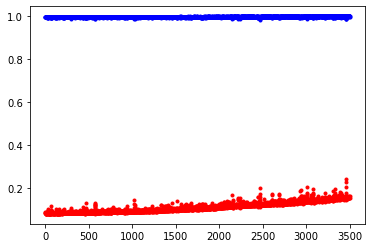

In [81]:
df = df_pre.sample(frac = 0.5) 

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 3)
plt.plot(x_len, y_acc, "o", c = 'blue', markersize = 3)

plt.show()